### License
Copyright (c) 2022 Frederik Tørnstrøm (github.com/Frederik3152)

This software is provided 'as-is', without any express or implied
warranty. In no event will the authors be held liable for any damages
arising from the use of this software.

Permission is granted to anyone to use this software for any purpose,
including commercial applications, and to alter it and redistribute it
freely, subject to the following restrictions:

1. The origin of this software must not be misrepresented; you must not
   claim that you wrote the original software. If you use this software
   in a product, an acknowledgment in the product documentation would be
   appreciated but is not required.
2. Altered source versions must be plainly marked as such, and must not be
   misrepresented as being the original software.
3. This notice may not be removed or altered from any source distribution.

# IMDB Webscraping and EDA Project
### The goal of this project is to demonstrate different techniques in Python by gathering and analyzing movie data and thereby provide inputs to the studio executives upon how to maximize movie ratings of new releases.

In [1]:
#Importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [78]:
#Create the scraper function that searches for movie title, runtime, 
#release year, genre, director and rating using beautifulsoup
def imdb_scrape(url):
    #Getting the data from the url, using the requests library
    source = requests.get(url).text
    soup = BeautifulSoup(source, "lxml")
    
    #Creating the data variables from the required data
    movie_data = soup.find_all("div", class_="lister-item mode-advanced")
    
    #Creating the list to store the names of movies and adding the movie titles to that list
    movie_title = list()
    for movie in movie_data:
        name = movie.h3.a.text
        movie_title.append(name)

    #Creating the list to store the runtime of each movie and adding the data to that list
    runtime = list()
    for movie in movie_data:
        time = movie.find("span", class_="runtime",).text
        time1 = time.replace("min","")
        runtime.append(time1)

    #Creating the list to store the release year of movies and adding the data to that list    
    release_year = list()
    for movie in movie_data:
        year = movie.h3.find("span", class_="lister-item-year text-muted unbold").text
        year1 = year.replace("(","").replace(")","")
        release_year.append(year1)

    #Creating the list to store the genre of movies and adding the data to that list
    movie_genre = list()
    for movie in movie_data:
        genre = movie.find("span", class_="genre").text
        genre1 = genre.replace("\n", "")
        movie_genre.append(genre1)

    #Creating the list to store the directors of each movie and adding the data to that list
    director = list()
    for movie in movie_data:
        direc = movie.find("p", class_="",).a.text
        director.append(direc)

    #Creating the list to store the rating of movies and adding the data to that list
    movie_rating = list()
    for movie in movie_data:
        rating = movie.find("div", class_="inline-block ratings-imdb-rating").text
        rating1 = rating.replace("\n", "")
        movie_rating.append(rating1)
    
    #Converting the individual lists to one dictionary
    d = {"Movie Title":movie_title, "Runtime":runtime, 
             "Release Year":release_year, "Genre":movie_genre, 
             "Director":director, "IMDB Rating":movie_rating}
   
    #Converting the dictionary to dataframe
    df_movie = pd.DataFrame(d)
    return df_movie

In [79]:
#Creating the function that increminates the link, ensuring additional pages are included
def url_gen(i):
    l_link = "https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=" 
    r_link = "01&ref_=adv_nxt"
    url = l_link + str(i) + r_link
    return url 

#Converting page 1 to a list
d = [imdb_scrape("https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating")]

#Adds data scraped from incremental pages to 'd' list
for i in range(1,10):
    d.append(imdb_scrape(url_gen(i)))

#Creates the final dataframe, where all data is joined
d_complete = pd.concat(d, ignore_index=True)

In [80]:
#Exports the final dataframe to .csv as backup
#d_complete.to_csv('IMDB_Top1000_Movies.csv', index=False)

#### Now that the data is gathered by webscraping IMDB's top 1000 movies website, it will be analyzed and visualized below:

In [2]:
#Importing the data analysis libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

#Importing and reading the data per 29. september 2022
df_movies = pd.read_csv("IMDB_Top1000_Movies.csv")
df_movies.head()

,Movie Title,Runtime,Release Year,Genre,Director,IMDB Rating
0,The Shawshank Redemption,142,1994,Drama,Frank Darabont,9.3
1,The Godfather,175,1972,"Crime, Drama",Francis Ford Coppola,9.2
2,The Dark Knight,152,2008,"Action, Crime, Drama",Christopher Nolan,9.0
3,The Lord of the Rings: The Return of the King,201,2003,"Action, Adventure, Drama",Peter Jackson,9.0
4,Schindler's List,195,1993,"Biography, Drama, History",Steven Spielberg,9.0


In [3]:
#Bottom 5 records
df_movies.tail()

,Movie Title,Runtime,Release Year,Genre,Director,IMDB Rating
995,Sabrina,113,1954,"Comedy, Drama, Romance",Billy Wilder,7.6
996,From Here to Eternity,118,1953,"Drama, Romance, War",Fred Zinnemann,7.6
997,Snow White and the Seven Dwarfs,83,1937,"Animation, Adventure, Family",William Cottrell,7.6
998,The 39 Steps,86,1935,"Crime, Mystery, Thriller",Alfred Hitchcock,7.6
999,The Invisible Man,71,1933,"Horror, Sci-Fi",James Whale,7.6


In [4]:
#Exploring the dataframe to check for missing values
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Title   1000 non-null   object 
 1   Runtime       1000 non-null   int64  
 2   Release Year  1000 non-null   object 
 3   Genre         1000 non-null   object 
 4   Director      1000 non-null   object 
 5   IMDB Rating   1000 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [5]:
#Converting the "Release Year" column to integer by removing unnecessary characters
df_movies["Release Year"] = df_movies["Release Year"].str.replace("I","")
df_movies["Release Year"] = df_movies["Release Year"].str.replace("II","")
df_movies["Release Year"] = df_movies["Release Year"].str.replace("III","")
df_movies["Release Year"] = df_movies["Release Year"].astype("int")

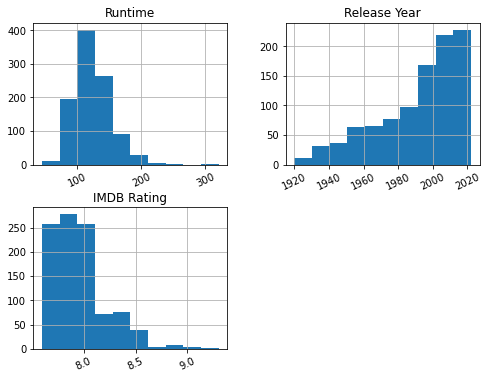

,Runtime,Release Year,IMDB Rating
count,1000.00000,1000.000000,1000.000000
mean,123.80600,1991.305000,7.964600
std,28.66793,23.980722,0.277243
min,45.00000,1920.000000,7.600000
25%,103.00000,1975.000000,7.700000
50%,120.00000,1999.000000,7.900000
75%,138.00000,2010.000000,8.100000
max,321.00000,2022.000000,9.300000


In [6]:
#Distribution of numerical values
df_movies.hist(figsize=(8,6), xrot=25)
plt.show()
df_movies.describe()

### First part of the analysis will be concerned with finding the best director for a new movie, guaranteeing a place in the top 1000 movies and ensuring the highest possible IMDB rating.  

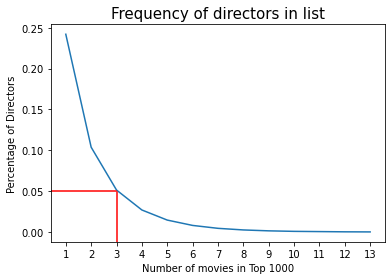

In [7]:
#Plotting the frequency of directors using a chi2 distribution
num_dir = pd.DataFrame(df_movies["Director"].value_counts())
plt.plot(num_dir, chi2.pdf(num_dir, df=1))

#Adding axis labels and a title
plt.ylabel("Percentage of Directors")
plt.xlabel("Number of movies in Top 1000")
plt.title("Frequency of directors in list", fontsize=15)

#Adding the line showing the focus area of top 5% of directors
plt.locator_params ("x", nbins = 14)
plt.axhline(y = 0.05, xmin = 0, xmax = 0.195, color ="r", linestyle = "-")
plt.axvline(x = 3, ymin = 0, ymax = 0.23, color = "r", linestyle = "-")
plt.show()

In [8]:
#Showing the directors with the highest average IMDB Rating
df_movies_dir = pd.concat([df_movies.groupby("Director", as_index=True)["IMDB Rating"].mean(), 
                           pd.DataFrame(df_movies["Director"].value_counts())], axis=1)

#Modifying the css format of the next cell to help with visualization
from IPython.display import display, HTML
CSS = """
div.cell:nth-child(16) .output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

In [9]:
#As per above chart, only those with 3 or more movies in the list are considered
display(df_movies_dir.sort_values(by="IMDB Rating", 
                                  ascending=False).query("Director >= 3"))
display(df_movies_dir.sort_values(by="Director", 
                                  ascending=False).query("Director >= 3"))

,IMDB Rating,Director
Christopher Nolan,8.462500,8
Peter Jackson,8.440000,5
Francis Ford Coppola,8.420000,5
Sergio Leone,8.340000,5
Charles Chaplin,8.333333,6
...,...,...
James Whale,7.733333,3
Ron Clements,7.733333,3
Terrence Malick,7.700000,3
Spike Lee,7.700000,4


,IMDB Rating,Director
Alfred Hitchcock,8.030769,13
Steven Spielberg,8.061538,13
Akira Kurosawa,8.158333,12
Hayao Miyazaki,8.010000,10
Martin Scorsese,8.140000,10
...,...,...
Michael Mann,7.933333,3
Brian De Palma,8.033333,3
Mel Gibson,8.100000,3
Michael Curtiz,8.100000,3


#### As is apparent from above tables, the director with the highest average IMDB rating and more than 3 movies on the list is "Christopher Nolan" with an 8.46 average rating over 8 movies. 

#### An argument could also be made that even getting a movie into top 1000 is more important than the average rating, and the studio should therefore seek out the directors with the most movies on the list, "Alfred Hitchcock" and "Steven Spielberg". 

#### Consequently, it is up to studio executives to decide which goal is more important and seek out the director that best fits their goal.

### The next analysis is concerned with finding the genre and subgenres most likely to earn the movie a place in IMDB's top 1000. 

Text(0, 0.5, 'Frequency')

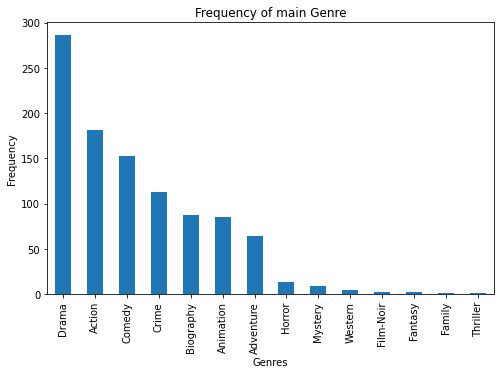

In [10]:
#Splitting the Genre column into Main Genre and subgenres
df_movies_genre = pd.DataFrame(df_movies["Genre"])
df_movies_genre[["Main Genre", "Subgenre1", "Subgenre2"]] = df_movies["Genre"].str.split(",", expand=True)
df_movies_genre["Main Genre"] = df_movies_genre["Main Genre"].str.replace(" ","")
df_movies_genre["Subgenre1"] = df_movies_genre["Subgenre1"].str.replace(" ","")
df_movies_genre["Subgenre2"] = df_movies_genre["Subgenre2"].str.replace(" ","")
df_genre_split = df_movies_genre.drop(df_movies_genre.columns[0], axis=1)

#Plotting the Main Genre distribution, showcasing most frequent genre
ax = df_genre_split["Main Genre"].value_counts().plot(kind="bar",
                                    figsize=(8,5),
                                    title="Frequency of main Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Frequency")

#### Based on above chart, it is reasonable to assume that to maximize one's chances of creating a movie for the top 1000 list, it needs to have "Drama" as it's Main Genre.

Text(0, 0.5, 'Frequency')

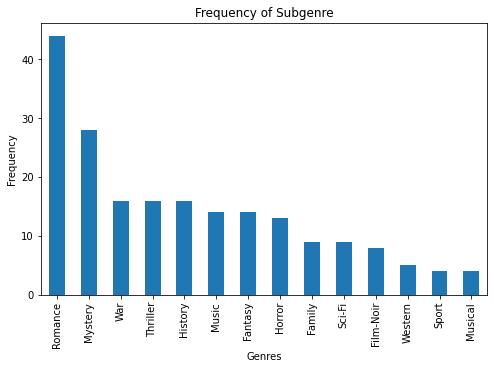

In [11]:
#Checking and plotting the subgenre1 most often associated with "Drama" as Main Genre
df_genre_sub1 = df_genre_split[df_genre_split["Main Genre"].str.contains("Drama")]

ay = df_genre_sub1["Subgenre1"].value_counts().plot(kind="bar",
                                    figsize=(8,5),
                                    title="Frequency of Subgenre")
ay.set_xlabel("Genres")
ay.set_ylabel("Frequency")

#### The first subgenre most often associated with "Drama" is Romance.

Text(0, 0.5, 'Frequency')

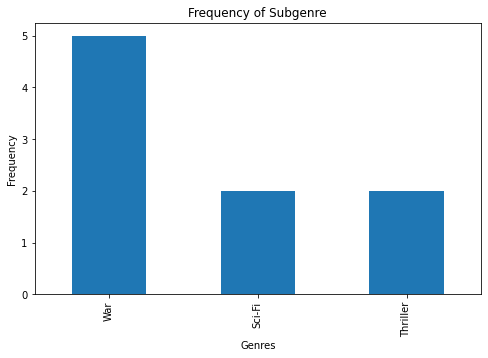

In [12]:
#Checking and plotting the subgenre2 most often associated with "Drama" as Main Genre and "Romance" as subgenre1
df_genre_sub2 = df_genre_sub1[df_genre_sub1["Subgenre1"].str.contains("Romance", na=False)]

ay = df_genre_sub2["Subgenre2"].value_counts().plot(kind="bar",
                                    figsize=(8,5),
                                    title="Frequency of Subgenre")
ay.set_xlabel("Genres")
ay.set_ylabel("Frequency")

#### The second subgenre most often associated with Drama / Romance movies is "War" movies, however, due to the low frequency of this specific genre combination, it is assumed that the second subgenre is much less important for a movie's success.

#### Therefore, it can be concluded that the genre combination most likely to lead to a place in the top 1000 list is a Drama / Romance movie. 
#### Notable Drama / Romance movies include: Forest Gump, Life is Beautiful and Good Will Hunting.

### The last analysis will be concerned with determining the optimal runtime to aim for, relative to modern trends and movie rating.

In [13]:
#Creating bins to segment release_year into a more manageable amount
bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
df_movies["Release_Bins"] = pd.cut(df_movies["Release Year"], bins)
df_movies.head()

,Movie Title,Runtime,Release Year,Genre,Director,IMDB Rating,Release_Bins
0,The Shawshank Redemption,142,1994,Drama,Frank Darabont,9.3,"(1990, 2000]"
1,The Godfather,175,1972,"Crime, Drama",Francis Ford Coppola,9.2,"(1970, 1980]"
2,The Dark Knight,152,2008,"Action, Crime, Drama",Christopher Nolan,9.0,"(2000, 2010]"
3,The Lord of the Rings: The Return of the King,201,2003,"Action, Adventure, Drama",Peter Jackson,9.0,"(2000, 2010]"
4,Schindler's List,195,1993,"Biography, Drama, History",Steven Spielberg,9.0,"(1990, 2000]"


In [14]:
#Checking the average runtime of each bin
runtime_avg = df_movies.groupby("Release_Bins")["Runtime"].mean()
runtime_avg

Release_Bins
(1920, 1930]     93.181818
(1930, 1940]    103.750000
(1940, 1950]    107.675676
(1950, 1960]    118.937500
(1960, 1970]    127.484848
(1970, 1980]    124.810811
(1980, 1990]    121.791209
(1990, 2000]    123.953947
(2000, 2010]    124.264317
(2010, 2020]    128.628319
(2020, 2030]    155.526316
Name: Runtime, dtype: float64

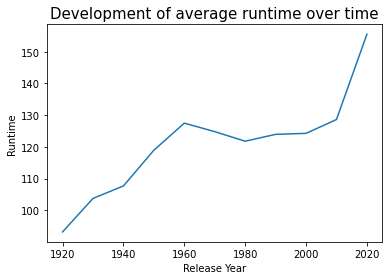

In [15]:
#Exporting the runtime average vector to a list
runtime_avg_list = runtime_avg.tolist()

#Creates the plot, showing the development in the runtime over time
plt.plot(bins[:-1], runtime_avg_list)

plt.ylabel("Runtime")
plt.xlabel("Release Year")
plt.title("Development of average runtime over time", fontsize=15)

plt.show()

#### As the chart and the data vector implies, the average movie on the top 1000 list has increased significantly over time. In fact, in the 100 years between 1920s and 2020s, the average movie is more than 1 hour longer, an increase of 67%. 

## Conclusion:
### This project has helped demonstrate the ability to do several techniques in Python including webscraping, exploratory data analysis and data visualization. 
### The main takeaways from the project is that to maximize the chances of a new movie earning a place in IMDB's top 1000 movies of all time list, and receiving higher public ratings, the studio needs to look for a successful director, genre combination and runtime. 
### This director can be "Christopher Nolan" or "Peter Jackson" to maximize ratings or "Alfred Hitchcock" or "Steven Spielberg" to maximize chances of reaching the list. The genre combination most likely to reach the top 1000 list is a Drama / Romance movie, and the runtime should follow historical trends and exceed 2:30 hours. 